### Псевдообращение посредством разложений svd, qr, plu

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import time

Проведем замеры по времени для квадратных матриц c вещественными числами

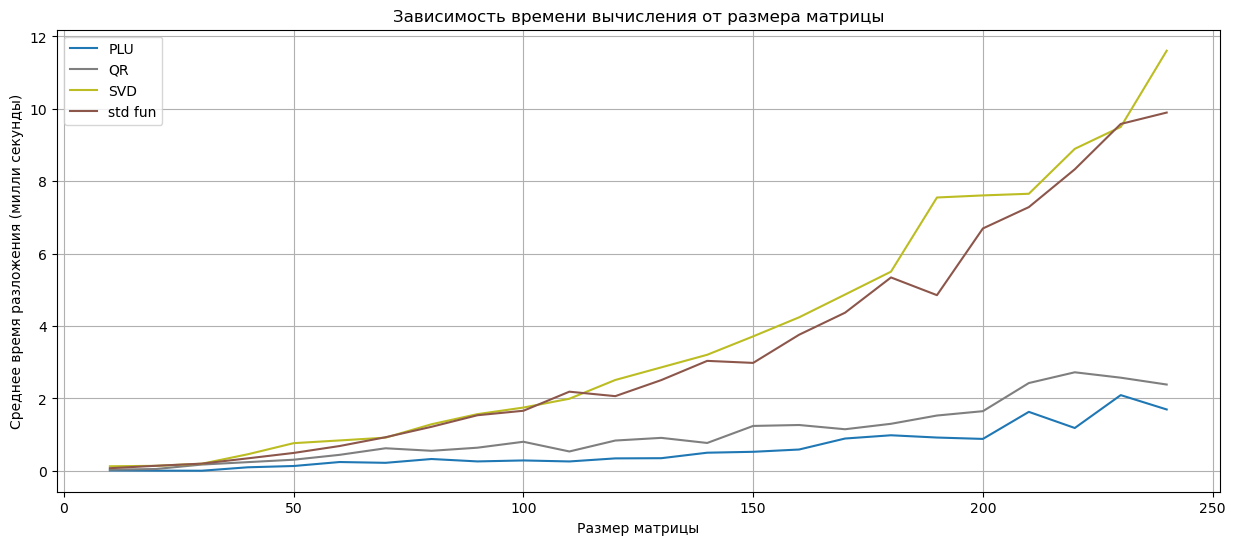

In [3]:
max_k = 25
max_m = 350
plu_time = []
qr_time = []
svd_time = []
std_time = []
size_n = [] 

for k in range(1, max_k, 1): 
    plu_time_k = []
    qr_time_k = []
    svd_time_k = []
    std_time_k = []
    Id = np.eye(k*10)
    
    for m in range(1, max_m):
        A = np.random.randn(k*10, k*10)

        # plu
        start = time.time()    
        invAA = np.linalg.solve(A.T @ A, Id)
        pinvA = invAA @ A.T
        end = time.time()
        plu_time_k.append(end - start)
        
        # qr
        start = time.time()    
        Q, R = np.linalg.qr(A)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = invR @ Q.T
        end = time.time()
        qr_time_k.append(end - start)
        
        # svd
        start = time.time()    
        U, S, Vh = np.linalg.svd(A, full_matrices=False)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = Vh.T @ np.diag(1/S) @ U.T
        end = time.time()
        svd_time_k.append(end - start)
        
        # standart
        start = time.time()    
        pinvA = np.linalg.pinv(A)
        end = time.time()
        std_time_k.append(end - start)
    
    # add results to arrays
    plu_time.append(np.mean(plu_time_k)*10**3)
    qr_time.append(np.mean(qr_time_k)*10**3)
    svd_time.append(np.mean(svd_time_k)*10**3)
    std_time.append(np.mean(std_time_k)*10**3)
    size_n.append(k * 10)
    
# report
plt.figure(figsize=(15, 6))
plt.plot(size_n, plu_time, label='PLU', color='tab:blue', linestyle='-')
plt.plot(size_n, qr_time, label='QR', color='tab:gray', linestyle='-')
plt.plot(size_n, svd_time, label='SVD', color='tab:olive', linestyle='-')
plt.plot(size_n, std_time, label='std fun', color='tab:brown', linestyle='-')
plt.xlabel('Размер матрицы')
plt.ylabel('Среднее время разложения (милли секунды)')
plt.title('Зависимость времени вычисления от размера матрицы')
plt.grid(True)
plt.legend()
plt.show()

**Итог:** 
    
самым быстрым оказался PLU, т.к. требует всего 2 матричных перемножения и 1 обращение матрицы (методом PLU)

не сильно отстающим оказался QR - здесь требовалось само разложение, 1 обращение (треугольной матрицы) и 1 перемножение. И взаправду - обращение более ресурсоемкая операция чем умножение, что мы и наблюдаем. 

Так же отметим, что асимптотически вычисление qr и plu одинаково.

Отстающим звеном оказался SVD, так же стоит заметить, что стандартная функция использует именно этот метод.

**Проведем замеры по времени для квадратных матриц c комплексными числами**

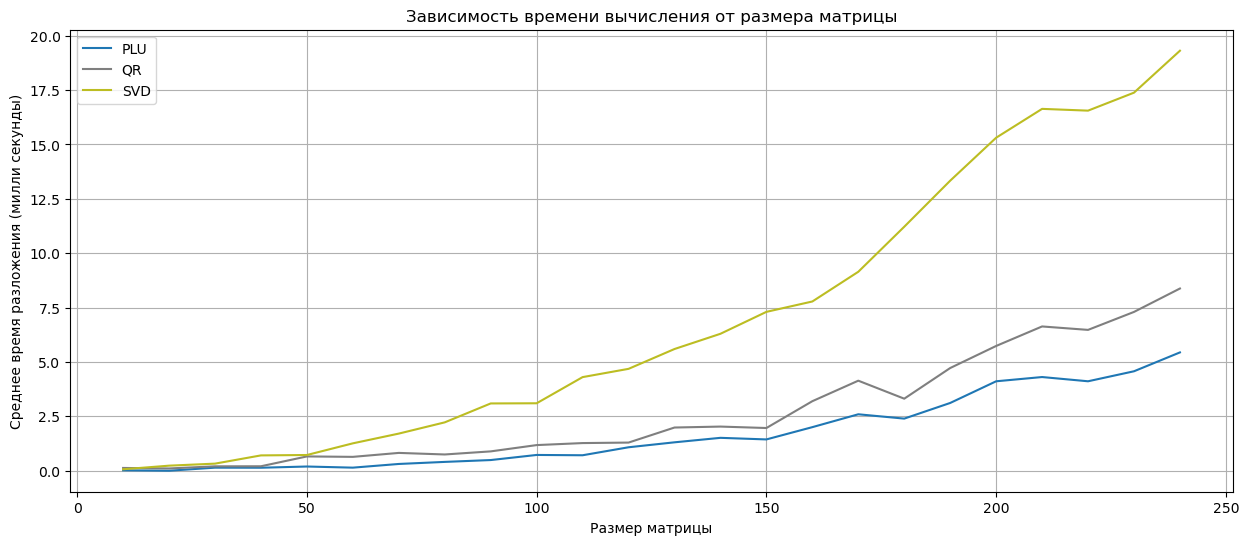

In [12]:
max_k = 25
max_m = 350
plu_time = []
qr_time = []
svd_time = []
size_n = [] 

for k in range(1, max_k, 1): 
    plu_time_k = []
    qr_time_k = []
    svd_time_k = []
    Id = np.eye(k*10)
    
    for m in range(1, max_m):
        A = np.random.randn(k*10, k*10) + 1.j * np.random.randn(k*10, k*10)

        # plu
        start = time.time()    
        invAA = np.linalg.solve(A.conjugate().T @ A, Id)
        pinvA = invAA @ A.conjugate().T
        end = time.time()
        plu_time_k.append(end - start)
        
        # qr
        start = time.time()    
        Q, R = np.linalg.qr(A)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = invR @ Q.conjugate().T
        end = time.time()
        qr_time_k.append(end - start)
        
        # svd
        start = time.time()    
        U, S, Vh = np.linalg.svd(A, full_matrices=False)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = Vh.conjugate().T @ np.diag(1/S) @ U.conjugate().T
        end = time.time()
        svd_time_k.append(end - start)
    
    # add results to arrays
    plu_time.append(np.mean(plu_time_k)*10**3)
    qr_time.append(np.mean(qr_time_k)*10**3)
    svd_time.append(np.mean(svd_time_k)*10**3)
    size_n.append(k * 10)
    
# report
plt.figure(figsize=(15, 6))
plt.plot(size_n, plu_time, label='PLU', color='tab:blue', linestyle='-')
plt.plot(size_n, qr_time, label='QR', color='tab:gray', linestyle='-')
plt.plot(size_n, svd_time, label='SVD', color='tab:olive', linestyle='-')
plt.xlabel('Размер матрицы')
plt.ylabel('Среднее время разложения (милли секунды)')
plt.title('Зависимость времени вычисления от размера матрицы')
plt.grid(True)
plt.legend()
plt.show()

**Итог:** по иронии судьбы - сложность увеличилась примерно в 2 раза для всех разложений. Т.к. теперь храним не одно число float64 а пару чисел. И как следствие вычислений делаем примерно в 2 раза больше, что и видем на графиках

**Проведем замеры по времени для прямоугольных матриц c вещественными числами**

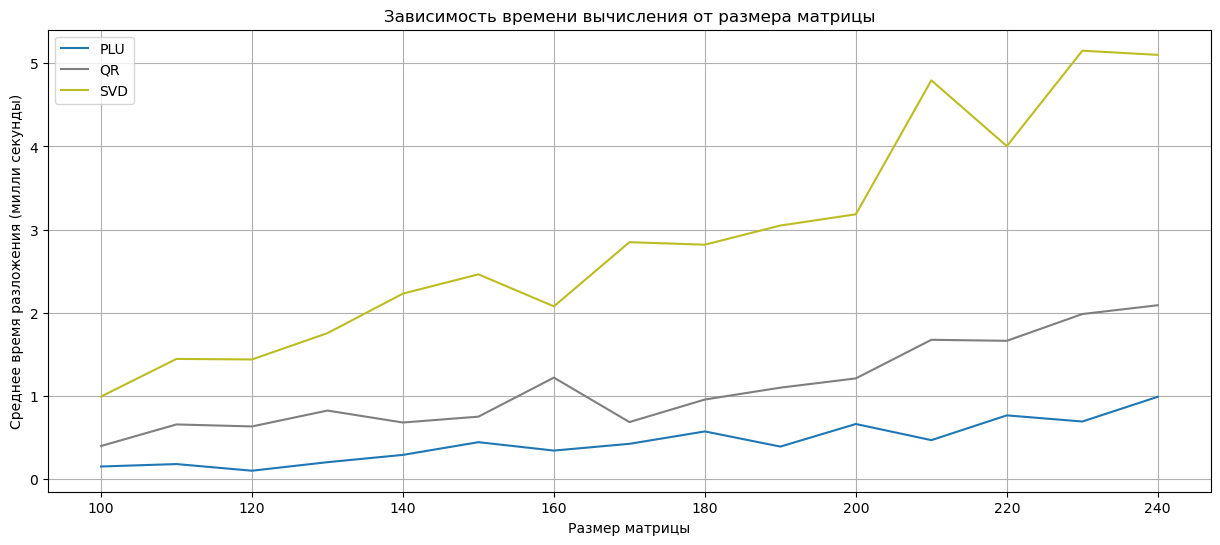

In [13]:
max_k = 25
max_m = 350
plu_time = []
qr_time = []
svd_time = []
size_n = [] 

for k in range(10, max_k, 1): 
    plu_time_k = []
    qr_time_k = []
    svd_time_k = []
    n = int(5/3 * (k*10))
    m = int(3/5 * (k*10))
    Id = np.eye(m)
    
    for j in range(1, max_m):
        A = np.random.randn(n, m)

        # plu
        start = time.time()    
        invAA = np.linalg.solve(A.T @ A, Id)
        pinvA = invAA @ A.T
        end = time.time()
        plu_time_k.append(end - start)
        
        # qr
        start = time.time()    
        Q, R = np.linalg.qr(A)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = invR @ Q.T
        end = time.time()
        qr_time_k.append(end - start)
        
        # svd
        start = time.time()    
        U, S, Vh = np.linalg.svd(A, full_matrices=False)
        invR = scipy.linalg.solve_triangular(R, Id)
        pinvA = Vh.T @ np.diag(1/S) @ U.T
        end = time.time()
        svd_time_k.append(end - start)
    
    # add results to arrays
    plu_time.append(np.mean(plu_time_k)*10**3)
    qr_time.append(np.mean(qr_time_k)*10**3)
    svd_time.append(np.mean(svd_time_k)*10**3)
    size_n.append(k * 10)
    
# report
plt.figure(figsize=(15, 6))
plt.plot(size_n, plu_time, label='PLU', color='tab:blue', linestyle='-')
plt.plot(size_n, qr_time, label='QR', color='tab:gray', linestyle='-')
plt.plot(size_n, svd_time, label='SVD', color='tab:olive', linestyle='-')
plt.xlabel('Размер матрицы')
plt.ylabel('Среднее время разложения (милли секунды)')
plt.title('Зависимость времени вычисления от размера матрицы')
plt.grid(True)
plt.legend()
plt.show()

**Итог:** Заметим что количество элементов в матрице - аналогично случаю с квадратными матрицам, но при этом столбцовый ранг - меньше. Это дает свои преимущества во всех разложениях. 

Так в PLU - это достигается за счет обращения матрицы меньшей размерности (m x m), а не (n x n), где m < n. 

В QR за счет меньшего количества итераций с отражениями (применения матрицы Хаусхолдера) + меньше занимают места матрицы Q и R

В SVD аналогично QR мы тратим меньше места на запись и как следствие делаем меньше арифметических действий

**Определим точность вычислений для квадратных матриц (200 x 200) с вещественными числами и линейным распределением сингулярных чисел**

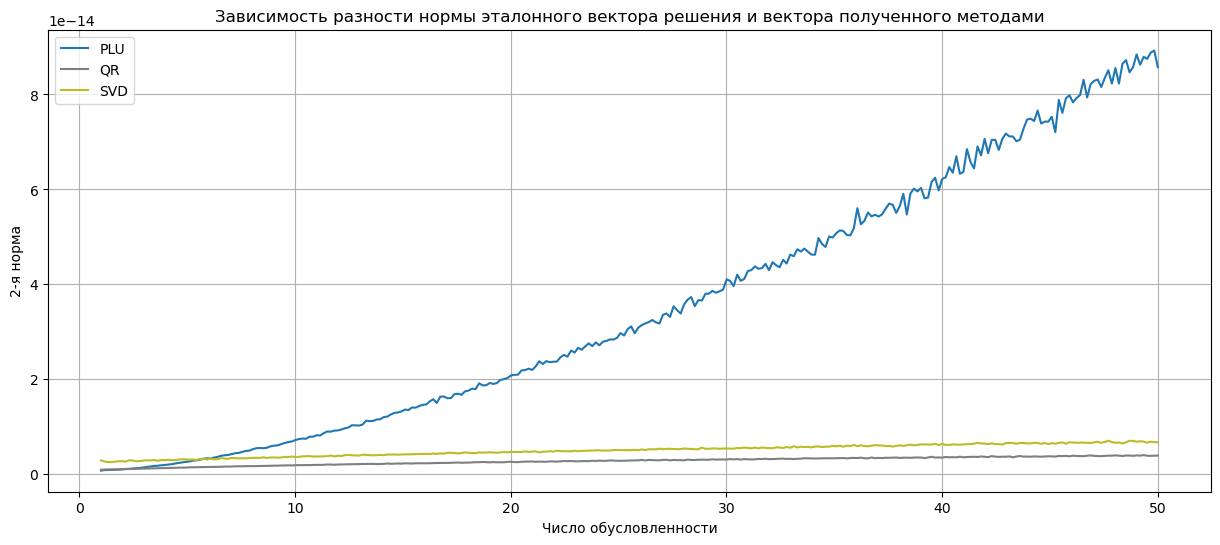

In [28]:
# settings
n = 200
cnt = 300
Id = np.eye(n)
Mat = []
x = []
b = []
cond = np.linspace(start=1, stop=50, num=cnt)
prob = [0.4, 0.5, 0.1]

for i in range(0, cnt):
    maskm = np.random.choice([-1, 1, 0], size=n ** 2, p=prob).reshape((n, n))
    U, S, Vh = np.linalg.svd(maskm * np.random.randn(n, n), full_matrices=False)
    S_modified = np.linspace(1, cond[i], n)
    Mat.append(U @ np.diag(S_modified) @ Vh)
    
for i in range(0, cnt):
    maskx = np.random.choice([-1, 1, 0], size=n, p=prob)
    X_mult = np.random.randint(1, 10**6)
    x.append(maskx * X_mult * np.random.rand(n))
    
plu_pinv = []
qr_pinv = []
svd_pinv = []
for i in range(0, cnt):
    # plu
    B = np.linalg.solve(Mat[i].T @ Mat[i], Id)
    plu_pinv.append(B @ Mat[i].T)
    
    # qr
    Q, R = np.linalg.qr(Mat[i])
    invR = scipy.linalg.solve_triangular(R, Id)
    qr_pinv.append(invR @ Q.T)
    
    # svd
    U, S, Vh = np.linalg.svd(Mat[i], full_matrices=False)
    svd_pinv.append(Vh.T @ np.diag(1/S) @ U.T)
    
plu_norm_mean = []
qr_norm_mean = []
svd_norm_mean = []
for i in range(0, cnt):
    plu_norm = []
    qr_norm = []
    svd_norm = []
    
    for j in range(0, cnt):
        b = Mat[i] @ x[j]
        norm_x = np.linalg.norm(x[j])
        
        plu_x = plu_pinv[i] @ b
        qr_x = qr_pinv[i] @ b
        svd_x = svd_pinv[i] @ b

        plu_norm.append(np.linalg.norm(x[j] - plu_x) / norm_x)
        qr_norm.append(np.linalg.norm(x[j] - qr_x) / norm_x)
        svd_norm.append(np.linalg.norm(x[j] - svd_x) / norm_x)
    
    plu_norm_mean.append(np.mean(plu_norm))
    qr_norm_mean.append(np.mean(qr_norm))
    svd_norm_mean.append(np.mean(svd_norm))
    
plt.figure(figsize=(15, 6))
plt.plot(cond, plu_norm_mean, label='PLU', color='tab:blue', linestyle='-')
plt.plot(cond, qr_norm_mean, label='QR', color='tab:gray', linestyle='-')
plt.plot(cond, svd_norm_mean, label='SVD', color='tab:olive', linestyle='-')
plt.xlabel('Число обусловленности')
plt.ylabel('2-я норма')
plt.title('Зависимость разности нормы эталонного вектора решения и вектора полученного методами')
plt.grid(True)
plt.legend()
plt.show()

**Когда начинает ломаться PLU**

![plu](./reports/Сломалось-PLU.png)

**Когда начинает ломаться QR и SVD**

![plu](./reports/Сломались-QR-SVD.png)

**Как выглядит счастливая семья**

![plu](./reports/Как-выглядит-счастливая-семья.png)